In [1]:
%matplotlib inline

In [41]:
import numpy as np

In [161]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata, load_digits, make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#mnist = fetch_mldata("MNIST original")

In [4]:
digits = load_digits()

In [6]:
X = digits.data
y = digits.target

In [163]:
# rescale the data, use the traditional train/test split
X, y = digits.data / digits.data.max(), digits.target

X, y = make_circles(n_samples=1800, random_state=1234)

X_train, X_test = X[:900], X[900:]
y_train, y_test = y[:900], y[900:]


# 1D along a line, A=[−1/3,1/3], B=[−1,−2/3]∪[2/3,1]
X = np.linspace(-1, 1, 1800)
y = np.zeros_like(X)
y[(-1/3<X) & (X<1/3)] = 1
X = X.reshape(1800, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=900, random_state=2)

In [166]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=0, tol=1e-4, random_state=1,
                    learning_rate_init=.05, activation='tanh')

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.998889
Test set score: 0.992222


In [172]:
hidden_layer_sizes = mlp.hidden_layer_sizes
hidden_layer_sizes = list(hidden_layer_sizes)
layer_units = [X_test.shape[1]] + hidden_layer_sizes + [mlp.n_outputs_]

activations = [X_test]
for i in range(mlp.n_layers_ - 1):
    activations.append(np.empty((X.shape[0],
                                 layer_units[i + 1])))
# forward propagate
mlp._forward_pass(activations)
y_pred = activations[-1]

In [173]:
y_pred2 = mlp.predict_proba(X_test)[:, 1]

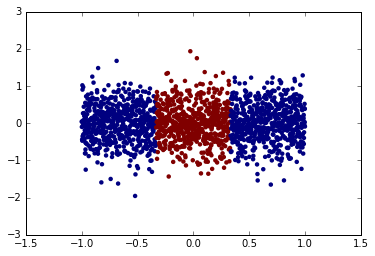

In [183]:
plt.scatter(X, np.random.normal(scale=0.5, size=1800), c=y, lw=0.)

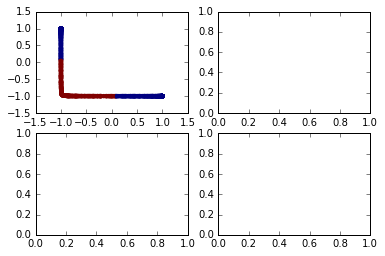

In [176]:
t = activations[-2]
fig, axes = plt.subplots(2, 2)
#for (i,j), ax in zip(((0,1), (1,2), (2,0)), axes.ravel()):
for (i,j), ax in zip(((0,1),), axes.ravel()):
    ax.scatter(t[:,i], t[:,j], c=y_test, lw=0)

In [178]:
mlp.coefs_[-1], mlp.intercepts_[-1]

(array([[-6.4964731 ],
        [-6.51691883]]), array([-5.80348451]))

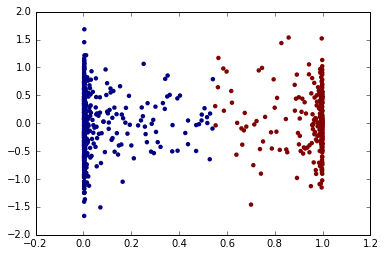

In [182]:
plt.scatter(activations[-1], np.random.normal(scale=0.5, size=900), c=y_test, lw=0)